In [2]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import nltk
regex=nltk.RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download("wordnet")
from nltk.corpus import wordnet #importing wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords    #importing stopwords
stopwords=stopwords.words()   
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [4]:
train = pd.read_csv('C:/Users/dell/Desktop/Other Projects/Twitter Sentiment Analysis/train.csv')
test = pd.read_csv('C:/Users/dell/Desktop/Other Projects/Twitter Sentiment Analysis/test.csv')

In [5]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [6]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
## check distribution of length of the tweets

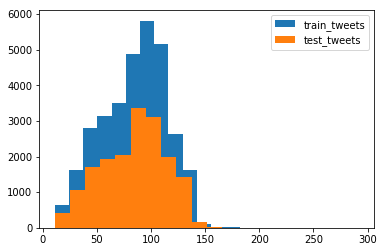

In [10]:
import matplotlib.pyplot as plt
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

## Text Pre Processing

In [4]:
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" "))) ## no of words
df[['tweet','word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


In [5]:
df['char_count'] = df['tweet'].str.len() ## no of characters
df[['tweet','char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,118
4,factsguide: society now #motivation,39


In [6]:
def avg_word(sentence):  
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))  ##avg word length

df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
df[['tweet','avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,4.555556
1,@user @user thanks for #lyft credit i can't us...,5.315789
2,bihday your majesty,5.666667
3,#model i love u take with u all the time in ...,7.214286
4,factsguide: society now #motivation,8.000000


In [7]:
from nltk.corpus import stopwords    
stop = stopwords.words('english')

df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop])) ##counting stopwords
df[['tweet','stopwords']].head()

,tweet,stopwords
0,@user when a father is dysfunctional and is s...,10
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,5
4,factsguide: society now #motivation,1


In [8]:
df['hastags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')])) ##counting special characters
df[['tweet','hastags']].head()

,tweet,hastags
0,@user when a father is dysfunctional and is s...,1
1,@user @user thanks for #lyft credit i can't us...,3
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


In [9]:
df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()])) ##counting numerics
df[['tweet','numerics']].head()

,tweet,numerics
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [10]:
## converting to lower case
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet'].head()

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object

In [11]:
## removing punctuations
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urã...
4                    factsguide society now motivation
Name: tweet, dtype: object

In [12]:
from nltk.corpus import stopwords ##removing stopwords
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3    model love u take u time urãâââ ãâââãâââãâââãâ...
4                        factsguide society motivation
Name: tweet, dtype: object

In [13]:
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]  ##couting common word
freq

user     17473
love      2647
ãâââ      2510
day       2198
ãââ       1812
happy     1663
amp       1582
im        1139
u         1136
time      1110
dtype: int64

In [14]:
freq = list(freq.index)
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq)) ##common word removal
df['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3      model take urãâââ ãâââãâââãâââãâââ ãâââãâââãâââ
4                        factsguide society motivation
Name: tweet, dtype: object

In [15]:
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[-10:] ##finding rare words
freq 

kikuyu                                        1
bhabhi                                        1
trailn2v3                                     1
masnou                                        1
sooãââ                                        1
ãââmyworkãâââãâââ¼tattooingãâââforeverãâââ    1
gotchu                                        1
kikme                                         1
miyakoisland                                  1
punfail                                       1
dtype: int64

In [16]:
freq = list(freq.index)
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))  ## rare words removal
df['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3      model take urãâââ ãâââãâââãâââãâââ ãâââãâââãâââ
4                        factsguide society motivation
Name: tweet, dtype: object

In [17]:
from textblob import TextBlob
df['tweet'][:5].apply(lambda x: str(TextBlob(x).correct())) ## spelling correction

0    father dysfunctional selfish drags kiss dysfun...
1    thanks left credit can use cause dont offer wh...
2                                       midday majesty
3      model take urãâââ ãâââãâââãâââãâââ ãâââãâââãâââ
4                        factsguide society motivation
Name: tweet, dtype: object

In [18]:
TextBlob(df['tweet'][1]).words  ## Tokenization

WordList(['thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'])

In [19]:
##Lemmatization
from textblob import Word
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))  
df['tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3      model take urãâââ ãâââãâââãâââãâââ ãâââãâââãâââ
4                        factsguide society motivation
Name: tweet, dtype: object

In [ ]:
## understanding the more common words used in the tweet : wordcloud
## most frequent words in large size and less frequent words appear in small size

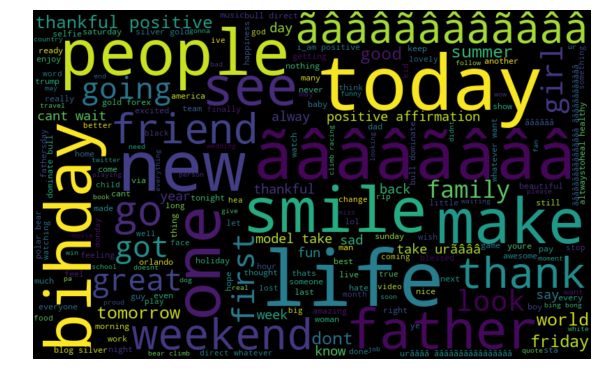

In [23]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
